<a href="https://colab.research.google.com/github/JASTIPAVAN/EDA/blob/main/EDA_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("JASTI PAVAN, 21BDS0309")

JASTI PAVAN, 21BDS0309


**Importing necessary libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Reading the dataset
data = pd.read_csv('/content/PhDPublications.csv')
print(data.shape)
print(data.info())
print(data.describe())
print(data.head())

(915, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  915 non-null    int64  
 1   articles  915 non-null    int64  
 2   gender    915 non-null    object 
 3   married   915 non-null    object 
 4   kids      915 non-null    int64  
 5   prestige  915 non-null    float64
 6   mentor    915 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 50.2+ KB
None
         rownames    articles        kids    prestige      mentor
count  915.000000  915.000000  915.000000  915.000000  915.000000
mean   458.000000    1.692896    0.495082    3.103109    8.767213
std    264.282046    1.926069    0.764880    0.984249    9.483916
min      1.000000    0.000000    0.000000    0.755000    0.000000
25%    229.500000    0.000000    0.000000    2.260000    3.000000
50%    458.000000    1.000000    0.000000    3.150000    6.000000
75%   

In [5]:
print(data.shape)

(915, 7)


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  915 non-null    int64  
 1   articles  915 non-null    int64  
 2   gender    915 non-null    object 
 3   married   915 non-null    object 
 4   kids      915 non-null    int64  
 5   prestige  915 non-null    float64
 6   mentor    915 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 50.2+ KB
None


In [7]:
print(data.describe())

         rownames    articles        kids    prestige      mentor
count  915.000000  915.000000  915.000000  915.000000  915.000000
mean   458.000000    1.692896    0.495082    3.103109    8.767213
std    264.282046    1.926069    0.764880    0.984249    9.483916
min      1.000000    0.000000    0.000000    0.755000    0.000000
25%    229.500000    0.000000    0.000000    2.260000    3.000000
50%    458.000000    1.000000    0.000000    3.150000    6.000000
75%    686.500000    2.000000    1.000000    3.920000   12.000000
max    915.000000   19.000000    3.000000    4.620000   77.000000


In [8]:
print(data.head())

   rownames  articles  gender married  kids  prestige  mentor
0         1         0    male     yes     0      2.52       7
1         2         0  female      no     0      2.05       6
2         3         0  female      no     0      3.75       6
3         4         0    male     yes     1      1.18       3
4         5         0  female      no     0      3.75      26


**Module - 2 : Data Transformation**

In [4]:
print(data.isnull().sum())

rownames    0
articles    0
gender      0
married     0
kids        0
prestige    0
mentor      0
dtype: int64


**Module - 3 : Univariate Analysis**

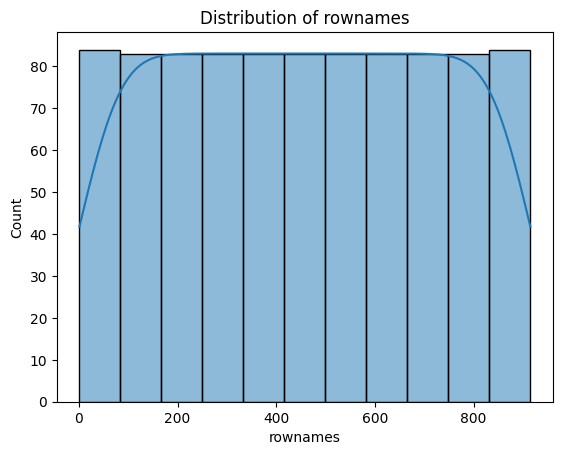

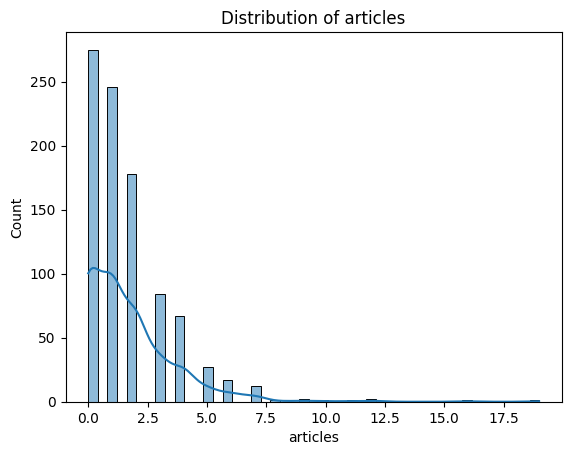

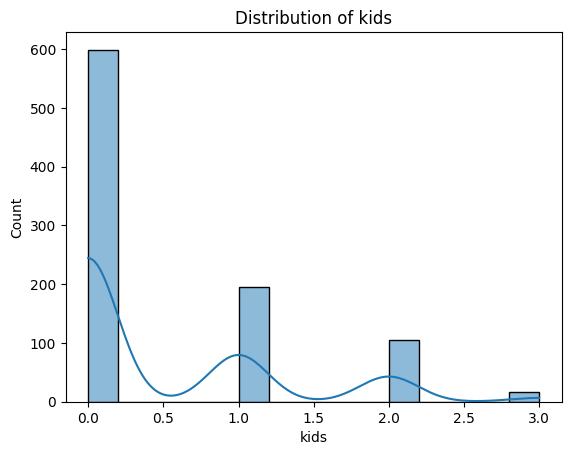

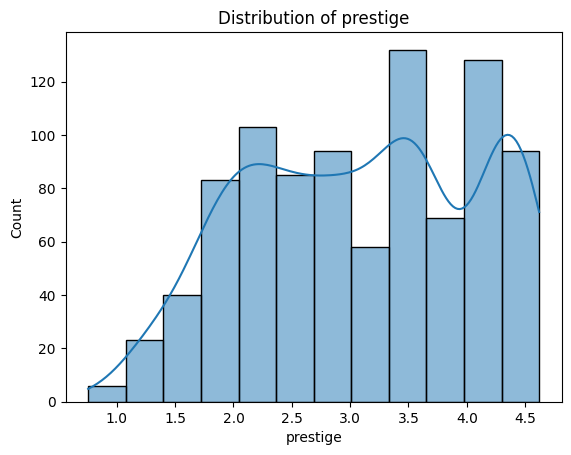

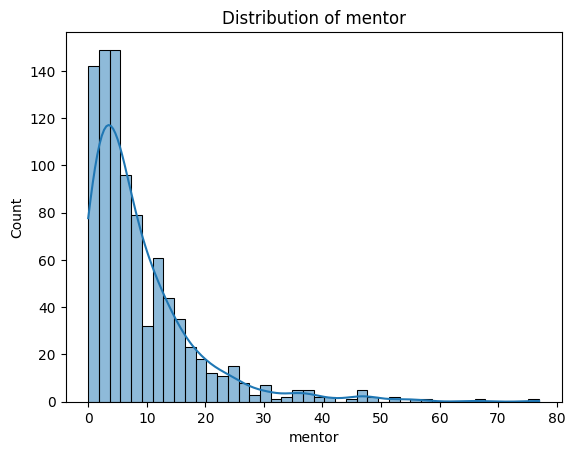

In [9]:
for col in data.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
for col in data.select_dtypes(include='category').columns:
    plt.figure()
    data[col].value_counts().plot(kind='bar')
    plt.title(f"Bar Plot of {col}")
    plt.show()

**Module - 3 : Bivariate Analysis**

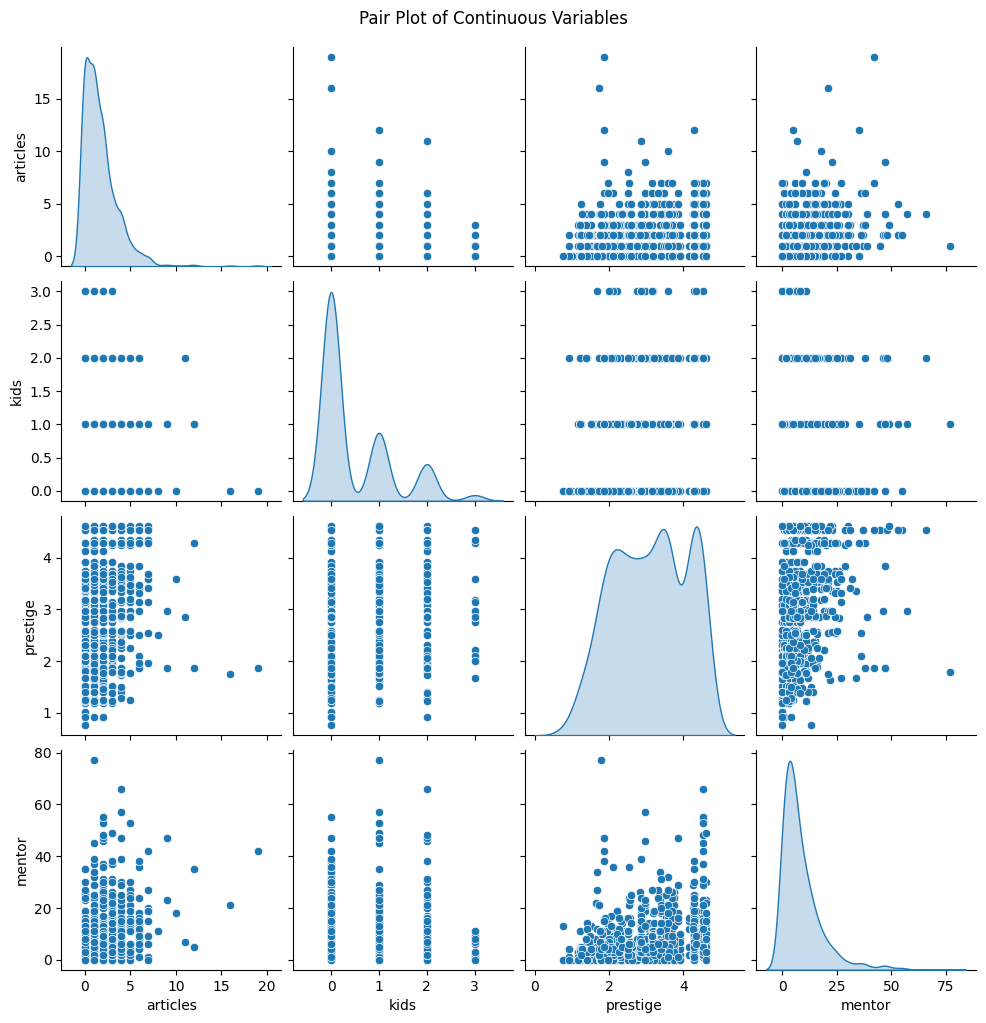

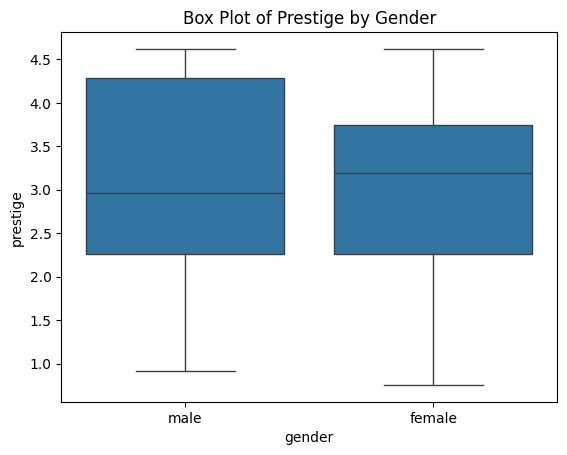

Contingency Table:
prestige  0.755  0.920  1.005  1.180  1.220  1.250  1.255  1.280  1.380  \
gender                                                                    
female        2      2      1      2      3      3      2      3      0   
male          0      1      0      3      3      3      0      0      1   

prestige  1.400  ...  3.690  3.750  3.850  3.920  4.140  4.250  4.290  4.340  \
gender           ...                                                           
female        8  ...     13     21      5      4      1      2     34      2   
male          1  ...     13      0      3     10      5      6     80      8   

prestige  4.540  4.620  
gender                  
female       21     20  
male         28     15  

[2 rows x 83 columns]


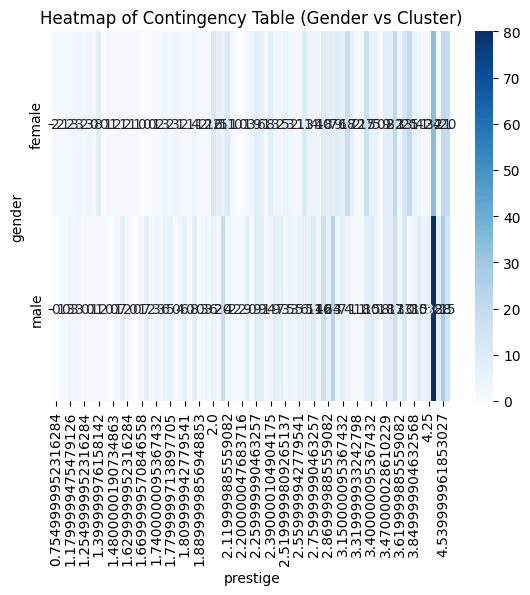

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Continuous vs Continuous (Scatter Plot + Correlation)
sns.pairplot(data[['articles', 'kids', 'prestige', 'mentor']], diag_kind='kde')
plt.suptitle("Pair Plot of Continuous Variables", y=1.02)
plt.show()
sns.boxplot(x='gender', y='prestige', data=data)
plt.title("Box Plot of Prestige by Gender")
plt.show()
contingency_table = pd.crosstab(data['gender'], data['prestige'])
print("Contingency Table:")
print(contingency_table)
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt='d')
plt.title("Heatmap of Contingency Table (Gender vs Cluster)")
plt.show()

**Correlation Matrix**

          rownames  articles      kids  prestige    mentor
rownames  1.000000  0.840483 -0.050011  0.119016  0.277449
articles  0.840483  1.000000 -0.045214  0.073339  0.305862
kids     -0.050011 -0.045214  1.000000 -0.026506  0.037020
prestige  0.119016  0.073339 -0.026506  1.000000  0.260414
mentor    0.277449  0.305862  0.037020  0.260414  1.000000


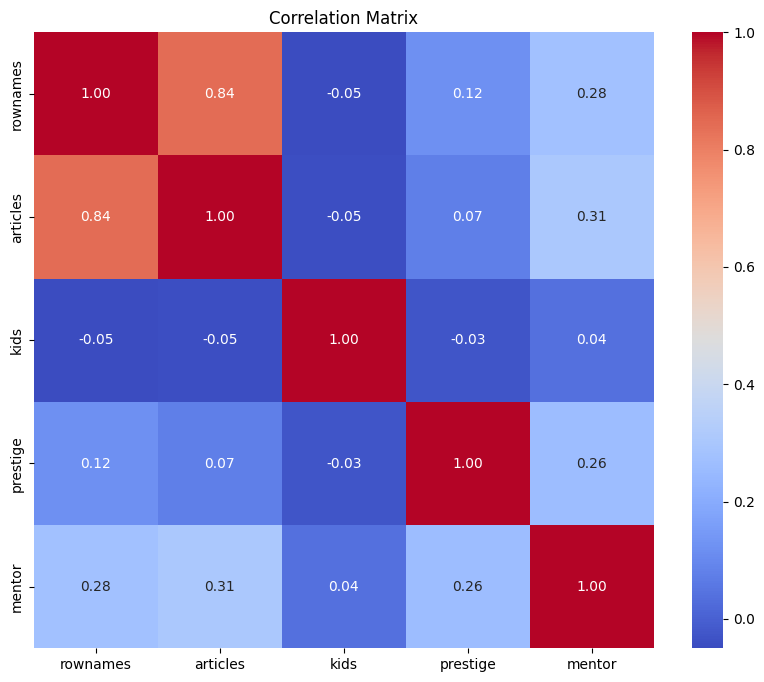

In [11]:
cor_matrix = data.select_dtypes(include='number').corr()
print(cor_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

**Module - 5 : Clustering**

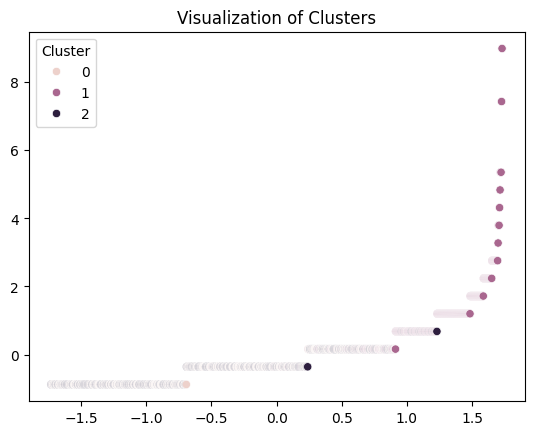

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=np.number))
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=data['Cluster'])
plt.title("Visualization of Clusters")
plt.show()

**Module - 6 : Dimensionality Reduction**

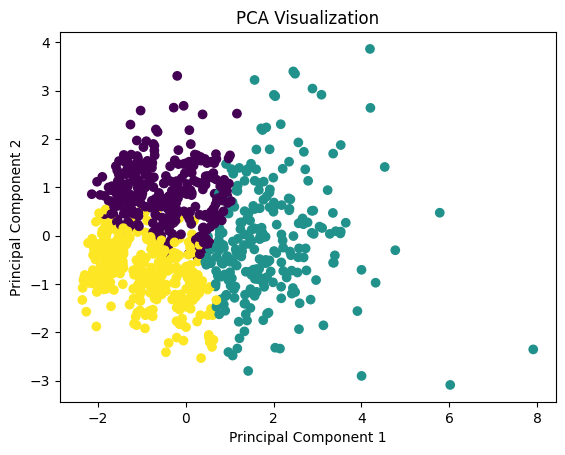

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['Cluster'])
plt.title("PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

**Module - 7 : Model Development and Evaluation**

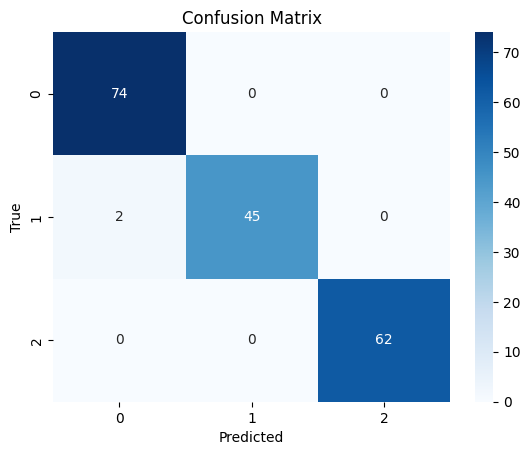

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        74
           1       1.00      0.96      0.98        47
           2       1.00      1.00      1.00        62

    accuracy                           0.99       183
   macro avg       0.99      0.99      0.99       183
weighted avg       0.99      0.99      0.99       183

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
if data['Cluster'].dtype == 'object':
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    data['Cluster'] = le.fit_transform(data['Cluster'])
X = data.select_dtypes(include=np.number).drop('Cluster', axis=1)
y = data['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
if len(data['Cluster'].unique()) == 2:
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()